In [1]:
# <VSCode-Cell id="part1_initial_setup_and_load" language="python">
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# ----------------------------------------------------------------
# 0. Î°úÏª¨ ÌôòÍ≤Ω ÏÑ§Ï†ï ÏïàÎÇ¥ (Ïä§ÌÅ¨Î¶ΩÌä∏ Ïã§Ìñâ Ï†Ñ ÌÑ∞ÎØ∏ÎÑêÏóêÏÑú ÏàòÌñâ)
# ----------------------------------------------------------------
# 1. Python 3.8 Ïù¥ÏÉÅ ÏÑ§ÏπòÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏
# 2. ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò (ÌÑ∞ÎØ∏ÎÑê/Î™ÖÎ†π ÌîÑÎ°¨ÌîÑÌä∏ÏóêÏÑú Ïã§Ìñâ):
#    pip install python-dotenv google-cloud-vision Pillow matplotlib torch torchvision torchaudio transformers accelerate bitsandbytes sentencepiece opencv-python-headless
# 3. NVIDIA GPU ÏÇ¨Ïö© Ïãú (Í∂åÏû•):
#    - NVIDIA ÎìúÎùºÏù¥Î≤Ñ ÏµúÏã† Î≤ÑÏ†Ñ ÏÑ§Ïπò
#    - CUDA Toolkit ÏÑ§Ïπò (PyTorchÏôÄ Ìò∏ÌôòÎêòÎäî Î≤ÑÏ†Ñ)
#    - cuDNN ÏÑ§Ïπò (PyTorchÏôÄ Ìò∏ÌôòÎêòÎäî Î≤ÑÏ†Ñ)
#    - PyTorch GPU Î≤ÑÏ†Ñ ÏÑ§Ïπò (Ïòà: CUDA 11.8 ÏÇ¨Ïö© Ïãú, PyTorch Í≥µÏãù ÏõπÏÇ¨Ïù¥Ìä∏ÏóêÏÑú ÎßûÎäî Î™ÖÎ†πÏñ¥ ÌôïÏù∏)
#      pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
#    CPUÎßå ÏÇ¨Ïö© ÏãúÏóêÎäî ÏùºÎ∞ò PyTorch ÏÑ§ÏπòÎ°úÎèÑ ÎèôÏûëÌïòÎÇò, Gemma Î™®Îç∏ ÏÜçÎèÑÍ∞Ä Îß§Ïö∞ ÎäêÎ¶ΩÎãàÎã§.
# ----------------------------------------------------------------

import os
import sys # sys ÏûÑÌè¨Ìä∏ Ï∂îÍ∞Ä (transformers ÏÑ§Ïπò Ïãú ÏÇ¨Ïö©Îê† Ïàò ÏûàÏùå)
import io
import json
import re

# ----------------------------------------------------------------
# 0.1. Ï∫êÏãú ÎîîÎ†âÌÜ†Î¶¨ ÏÑ§Ï†ï
# ----------------------------------------------------------------
# ÏÇ¨Ïö©Ïûê ÌôòÍ≤ΩÏóê ÎßûÍ≤å huggingface_cache Í≤ΩÎ°úÎ•º ÏÑ§Ï†ïÌïòÏÑ∏Ïöî.
new_cache_dir_base = r"D:\ÍπÄÍ∞ÄÎûåÏùò Í≥µÎ∂Ä\Ïã≠Îùº\huggingface_cache" # ÏÇ¨Ïö©ÏûêÍ∞Ä Ï†úÍ≥µÌïú Í≤ΩÎ°ú
hub_cache_dir = os.path.join(new_cache_dir_base, "hub")
os.makedirs(hub_cache_dir, exist_ok=True)
os.environ['HF_HOME'] = new_cache_dir_base
os.environ['HUGGINGFACE_HUB_CACHE'] = hub_cache_dir
os.environ['TRANSFORMERS_CACHE'] = hub_cache_dir
print(f"Hugging Face Cache dir set to: {hub_cache_dir}")

# ----------------------------------------------------------------
# 0.2. .env ÌååÏùº Î°úÎìú Î∞è Google Cloud Ïù∏Ï¶ù ÏÑ§Ï†ï
# ----------------------------------------------------------------
from dotenv import load_dotenv


env_file_name = "garakey.env"  # ÏÇ¨Ïö©ÏûêÏùò .env ÌååÏùº Ïù¥Î¶Ñ
current_working_directory = os.getcwd()
env_file_path = os.path.join(current_working_directory, env_file_name)

if os.path.exists(env_file_path):
    load_dotenv(env_file_path, override=True)  # Í∏∞Ï°¥ ÌôòÍ≤Ω Î≥ÄÏàòÎ•º ÎçÆÏñ¥Ïì∞ÎèÑÎ°ù ÏÑ§Ï†ï
    print(f"'{env_file_path}' ÌååÏùºÏóêÏÑú ÌôòÍ≤Ω Î≥ÄÏàòÎ•º Î°úÎìúÌñàÏäµÎãàÎã§.")
else:
    print(f"Í≤ΩÍ≥†: '{env_file_path}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÌôòÍ≤Ω Î≥ÄÏàò Î°úÎìúÏóê Ïã§Ìå®ÌñàÏäµÎãàÎã§.")
    print(f"  ÌòÑÏû¨ ÏûëÏóÖ ÎîîÎ†âÌÜ†Î¶¨: {current_working_directory}")
    print(f"  Ï∞æÏúºÎ†§Îäî .env ÌååÏùº Í≤ΩÎ°ú: {env_file_path}")

# Google Cloud Ïù∏Ï¶ù ÌååÏùº Í≤ΩÎ°ú ÌôïÏù∏ (ÌôòÍ≤Ω Î≥ÄÏàòÏóêÏÑú)
# Ïù¥ Î∂ÄÎ∂ÑÏùÄ Vision API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ Ï¥àÍ∏∞Ìôî Ïãú ÏûêÎèôÏúºÎ°ú ÏÇ¨Ïö©Îê©ÎãàÎã§.
# Î™ÖÏãúÏ†ÅÏúºÎ°ú credentials_file Î≥ÄÏàòÎ•º ÏÑ§Ï†ïÌïòÎäî ÎåÄÏã† ÌôòÍ≤Ω Î≥ÄÏàòÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
credentials_path_from_env = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")
if credentials_path_from_env and os.path.exists(credentials_path_from_env):
    print(f"Google Cloud Ïù∏Ï¶ù ÌååÏùº (ÌôòÍ≤Ω Î≥ÄÏàò GOOGLE_APPLICATION_CREDENTIALS ÌôïÏù∏): {credentials_path_from_env}")
else:
    print(f"Í≤ΩÍ≥†: GOOGLE_APPLICATION_CREDENTIALS ÌôòÍ≤Ω Î≥ÄÏàòÍ∞Ä ÏÑ§Ï†ïÎêòÏßÄ ÏïäÏïòÍ±∞ÎÇò Ìï¥Îãπ ÌååÏùº Í≤ΩÎ°úÍ∞Ä Ïú†Ìö®ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
    print(f"  '{env_file_name}' ÌååÏùº ÎÇ¥Ïùò GOOGLE_APPLICATION_CREDENTIALS ÏÑ§Ï†ïÏùÑ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
    print(f"  ÏÑ§Ï†ïÎêú Í≤ΩÎ°ú (ÏóÜÏùÑ Ïàò ÏûàÏùå): {credentials_path_from_env}")

# ----------------------------------------------------------------
# 0.3. Gemma Î™®Îç∏ ID ÏÑ§Ï†ï (ÌïÑÏöîÏãú Îã§Î•∏ Í≥≥ÏúºÎ°ú Ïù¥Îèô Í∞ÄÎä•)
# ----------------------------------------------------------------
import torch # torch ÏûÑÌè¨Ìä∏Îäî PyTorch/GPU ÌôïÏù∏ ÎòêÎäî Î™®Îç∏ Î°úÎî© Ï†ÑÏóê ÌïÑÏöî
gemma_model_id = "google/gemma-3-4b-it"
print(f"Í∏∞Î≥∏ Gemma model ID set to: {gemma_model_id}") # ÎÇòÏ§ëÏóê Í≤ΩÎ°ú ÏÑ§Ï†ï ÏÖÄÏóêÏÑú ÎçÆÏñ¥Ïì∏ Ïàò ÏûàÏùå

# ----------------------------------------------------------------
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
# ----------------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import matplotlib.patches as patches
import cv2  # opencv-python-headless
from PIL import Image

# Google Cloud Vision API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ ÏûÑÌè¨Ìä∏
from google.cloud import vision
# from google.cloud.vision_v1 import types # ÌïÑÏöîÏãú Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©
# from google.oauth2 import service_account # .envÏôÄ ÌôòÍ≤ΩÎ≥ÄÏàò ÏÇ¨Ïö© Ïãú Î™ÖÏãúÏ†Å Î°úÎìúÎäî Î∂àÌïÑÏöî

# Transformers Í¥ÄÎ†® ÏûÑÌè¨Ìä∏
try:
    from transformers import AutoTokenizer, AutoModelForCausalLM, Gemma3ForConditionalGeneration
    # AutoProcessorÎäî Gemma2 Ïö©
except ImportError:
    print("Transformers ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ Ïã§Ìå®. ÏÑ§ÏπòÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
    print("ÌÑ∞ÎØ∏ÎÑêÏóêÏÑú Îã§Ïùå Î™ÖÎ†πÏúºÎ°ú ÏÑ§ÏπòÌï† Ïàò ÏûàÏäµÎãàÎã§:")
    print("pip install transformers accelerate bitsandbytes sentencepiece")
    # Jupyter Notebook ÌôòÍ≤ΩÏóêÏÑúÎäî ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÏÑ§Ïπò ÏãúÎèÑ Í∞ÄÎä• 
    # import sys
    # if 'google.colab' in sys.modules or 'ipykernel' in sys.modules:
    #     try:
    #         print("ÎÖ∏Ìä∏Î∂Å ÌôòÍ≤ΩÏóêÏÑú Transformers ÏÑ§Ïπò ÏãúÎèÑ...")
    #         get_ipython().run_line_magic('pip', 'install --upgrade "transformers>=4.40.0" accelerate bitsandbytes sentencepiece')
    #         from transformers import AutoTokenizer, AutoModelForCausalLM, Gemma3ForConditionalGeneration
    #         print("Transformers ÏÑ§Ïπò Î∞è ÏûÑÌè¨Ìä∏ ÏÑ±Í≥µ.")
    #     except Exception as e_install:
    #         print(f"ÎÖ∏Ìä∏Î∂Å ÎÇ¥ Transformers ÏÑ§Ïπò Ï§ë Ïò§Î•ò: {e_install}")
    #         raise
    # else:
    raise # ÏùºÎ∞ò Python ÌôòÍ≤ΩÏóêÏÑúÎäî ÏßÅÏ†ë ÏÑ§Ïπò ÌïÑÏöî

# --- Matplotlib ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows Í∏∞Ï§Ä) ---
font_names_to_try = ['Malgun Gothic', 'NanumGothic', 'AppleGothic', 'ÎßëÏùÄ Í≥†Îîï', 'ÎÇòÎàîÍ≥†Îîï']
font_found = False
for font_name in font_names_to_try:
    try:
        font_path_check = fm.findfont(font_name, fallback_to_default=False) # Ìè∞Ìä∏ Í≤ΩÎ°ú ÌôïÏù∏
        if font_path_check: # Í≤ΩÎ°úÍ∞Ä Ï°¥Ïû¨ÌïòÎ©¥
            plt.rcParams['font.family'] = font_name # Ìï¥Îãπ Ìè∞Ìä∏ Ïù¥Î¶ÑÏúºÎ°ú ÏÑ§Ï†ï
            print(f"Matplotlib ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ïÎê®: '{font_name}' (Í≤ΩÎ°ú: {font_path_check})")
            font_found = True
            break
    except Exception: # findfontÍ∞Ä Î™ªÏ∞æÍ±∞ÎÇò rcParams ÏÑ§Ï†ï Ïãú Ïò§Î•ò
        pass # Îã§Ïùå Ìè∞Ìä∏ ÏãúÎèÑ

if not font_found:
    print("Í≤ΩÍ≥†: ÏßÄÏ†ïÎêú ÌïúÍ∏Ä Ìè∞Ìä∏('Malgun Gothic', 'NanumGothic' Îì±)Î•º ÏãúÏä§ÌÖúÏóêÏÑú Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
    print("  Matplotlib ÏãúÍ∞ÅÌôî Ïãú ÌïúÍ∏ÄÏù¥ Íπ®Ïßà Ïàò ÏûàÏäµÎãàÎã§.")
    print("  ÏãúÏä§ÌÖúÏóê ÌïúÍ∏Ä Ìè∞Ìä∏Î•º ÏÑ§ÏπòÌïòÍ±∞ÎÇò, ÏÑ§ÏπòÎêú Ìè∞Ìä∏ Ïù¥Î¶ÑÏùÑ ÏΩîÎìúÏóê Ï∂îÍ∞ÄÌïòÏó¨ ÏãúÎèÑÌï¥Î≥¥ÏÑ∏Ïöî.")
plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Î∂ÄÌò∏ Íπ®Ïßê Î∞©ÏßÄ

print("\n--- Ï¥àÍ∏∞ ÏÑ§Ï†ï, ÌôòÍ≤Ω Î≥ÄÏàò Î°úÎìú, ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏, Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å ---")

# ----------------------------------------------------------------
# 2. Ï£ºÏöî ÏÑ§Ï†ï, Î≥ÄÏàò Î∞è Í≤ΩÎ°ú Ï†ïÏùò
# ----------------------------------------------------------------
# !!!! Ï§ëÏöî: ÏïÑÎûò base_folder_pathÏôÄ image_file_nameÏùÑ Ïã§Ï†ú ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî!!!!
base_folder_path = r"D:\ÍπÄÍ∞ÄÎûåÏùò Í≥µÎ∂Ä\Ïã≠Îùº\-\ÏÉà Ìè¥Îçî\ÏÇ¨ÏßÑ"  # ÏòÅÏàòÏ¶ù Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Ìè¥Îçî
image_file_name = "ÏòÅÏàòÏ¶ù Ïù¥ÎØ∏ÏßÄ 1.jpg"  # Ïã§Ï†ú ÏòÅÏàòÏ¶ù Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ™Ö (ÌôïÏû•Ïûê Ìè¨Ìï®)
image_path = os.path.join(base_folder_path, image_file_name)

# Gemma Î™®Îç∏ ID (ÏúÑÏóêÏÑú ÏÑ§Ï†ïÌïú Í∏∞Î≥∏Í∞íÏùÑ Ïó¨Í∏∞ÏÑú ÎçÆÏñ¥Ïì∏ Ïàò ÏûàÏùå)
# gemma_model_id = "google/gemma-3-4b-it" #

# Ï∂úÎ†• ÌååÏùº Ïù¥Î¶Ñ ÏÑ§Ï†ï (Í≤∞Í≥º Ï†ÄÏû• Ïãú ÏÇ¨Ïö©)
output_json_file_template = "receipt_data_vision_{gemma_model_name}.json"

# --- Í≤ΩÎ°ú Î∞è Î™®Îç∏ ID Ï∂úÎ†• ÌôïÏù∏ ---
print(f"\nÏÇ¨Ïö©Ìï† Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú: {image_path}")
print(f"ÏÇ¨Ïö©Ìï† Gemma Î™®Îç∏ ID: {gemma_model_id}") # Ïó¨Í∏∞ÏÑú ÏÇ¨Ïö©Îê† ÏµúÏ¢Ö Î™®Îç∏ ID ÌôïÏù∏

# --- Ïù¥ÎØ∏ÏßÄ ÌååÏùº Ï°¥Ïû¨ Ïó¨Î∂Ä Î∞è Î°úÎìú Í∞ÄÎä•ÏÑ± ÌôïÏù∏ ---
receipt_image_pil = None # Ïù¥ÎØ∏ÏßÄ Í∞ùÏ≤¥ Ï¥àÍ∏∞Ìôî
if not os.path.exists(image_path):
    print(f"ÏóêÎü¨: Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ Îã§Ïùå Í≤ΩÎ°úÏóêÏÑú Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: {image_path}")
    print("  Ïä§ÌÅ¨Î¶ΩÌä∏ Ïã§ÌñâÏóê Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌï† Ïàò ÏûàÏäµÎãàÎã§. Í≤ΩÎ°úÎ•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    # raise FileNotFoundError(f"Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: {image_path}") # ÌïÑÏöîÏãú Ï£ºÏÑù Ìï¥Ï†úÌïòÏó¨ Ï§ëÎã®
else:
    try:
        # Ïù¥ÎØ∏ÏßÄ Î°úÎìú ÏãúÎèÑ
        receipt_image_pil = Image.open(image_path)
        print(f"Ïù¥ÎØ∏ÏßÄ Î°úÎìú ÏÑ±Í≥µ: {receipt_image_pil.format}, {receipt_image_pil.size}, {receipt_image_pil.mode}")
    except Exception as e:
        print(f"Ïù¥ÎØ∏ÏßÄ ÌååÏùº({image_path}) Î°úÎìú Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
        receipt_image_pil = None # Ïò§Î•ò Ïãú NoneÏúºÎ°ú ÏÑ§Ï†ï

print("\n--- Ï£ºÏöî ÏÑ§Ï†ï, Î≥ÄÏàò, Í≤ΩÎ°ú Ï†ïÏùò Î∞è Ïù¥ÎØ∏ÏßÄ Î°úÎìú ÏãúÎèÑ ÏôÑÎ£å ---")

# ----------------------------------------------------------------
# PyTorch Î∞è GPU ÌôïÏù∏
# ----------------------------------------------------------------
print(f"\nPyTorch Î≤ÑÏ†Ñ: {torch.__version__}")
print(f"CUDA ÏÇ¨Ïö© Í∞ÄÎä• Ïó¨Î∂Ä: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA Î≤ÑÏ†Ñ (PyTorch ÎπåÎìú Ïãú ÏÇ¨Ïö©Îêú Î≤ÑÏ†Ñ): {torch.version.cuda if torch.version.cuda else 'N/A'}")
    print(f"ÏÇ¨Ïö© Í∞ÄÎä•Ìïú GPU Í∞úÏàò: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"  GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDAÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÏäµÎãàÎã§. Î™®Îç∏Ïù¥ CPUÎ°ú Ïã§ÌñâÎê©ÎãàÎã§ (ÏÜçÎèÑ Ï†ÄÌïòÍ∞Ä ÏòàÏÉÅÎê©ÎãàÎã§).")

print("\n--- ÌååÌä∏ 1 (ÏÑ§Ï†ï Î∞è Ïù¥ÎØ∏ÏßÄ Î°úÎìú) ÏôÑÎ£å ---")
# </VSCode-Cell>

Hugging Face Cache dir set to: D:\ÍπÄÍ∞ÄÎûåÏùò Í≥µÎ∂Ä\Ïã≠Îùº\huggingface_cache\hub
'd:\ÍπÄÍ∞ÄÎûåÏùò Í≥µÎ∂Ä\Ïã≠Îùº\-\garakey.env' ÌååÏùºÏóêÏÑú ÌôòÍ≤Ω Î≥ÄÏàòÎ•º Î°úÎìúÌñàÏäµÎãàÎã§.
Google Cloud Ïù∏Ï¶ù ÌååÏùº (ÌôòÍ≤Ω Î≥ÄÏàò GOOGLE_APPLICATION_CREDENTIALS ÌôïÏù∏): D:/ÍπÄÍ∞ÄÎûåÏùò Í≥µÎ∂Ä/Ïã≠Îùº/-/ÏÉà Ìè¥Îçî/api/chinamoney-42dd61d0050f.json
Í∏∞Î≥∏ Gemma model ID set to: google/gemma-3-4b-it


C:\Users\jodoo\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\jodoo\AppData\Roaming\Python\Python310\site-packages\transformers\utils\hub.py:111: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


Matplotlib ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ïÎê®: 'Malgun Gothic' (Í≤ΩÎ°ú: C:\Windows\Fonts\malgun.ttf)

--- Ï¥àÍ∏∞ ÏÑ§Ï†ï, ÌôòÍ≤Ω Î≥ÄÏàò Î°úÎìú, ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏, Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å ---

ÏÇ¨Ïö©Ìï† Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú: D:\ÍπÄÍ∞ÄÎûåÏùò Í≥µÎ∂Ä\Ïã≠Îùº\-\ÏÉà Ìè¥Îçî\ÏÇ¨ÏßÑ\ÏòÅÏàòÏ¶ù Ïù¥ÎØ∏ÏßÄ 1.jpg
ÏÇ¨Ïö©Ìï† Gemma Î™®Îç∏ ID: google/gemma-3-4b-it
Ïù¥ÎØ∏ÏßÄ Î°úÎìú ÏÑ±Í≥µ: JPEG, (666, 805), RGB

--- Ï£ºÏöî ÏÑ§Ï†ï, Î≥ÄÏàò, Í≤ΩÎ°ú Ï†ïÏùò Î∞è Ïù¥ÎØ∏ÏßÄ Î°úÎìú ÏãúÎèÑ ÏôÑÎ£å ---

PyTorch Î≤ÑÏ†Ñ: 2.2.2+cu118
CUDA ÏÇ¨Ïö© Í∞ÄÎä• Ïó¨Î∂Ä: True
CUDA Î≤ÑÏ†Ñ (PyTorch ÎπåÎìú Ïãú ÏÇ¨Ïö©Îêú Î≤ÑÏ†Ñ): 11.8
ÏÇ¨Ïö© Í∞ÄÎä•Ìïú GPU Í∞úÏàò: 1
  GPU 0: NVIDIA GeForce RTX 4070 SUPER

--- ÌååÌä∏ 1 (ÏÑ§Ï†ï Î∞è Ïù¥ÎØ∏ÏßÄ Î°úÎìú) ÏôÑÎ£å ---


In [2]:

print(os.getenv("GOOGLE_APPLICATION_CREDENTIALS"))

D:/ÍπÄÍ∞ÄÎûåÏùò Í≥µÎ∂Ä/Ïã≠Îùº/-/ÏÉà Ìè¥Îçî/api/chinamoney-42dd61d0050f.json


In [3]:

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU count: {torch.cuda.device_count()}")
    print(f"GPU name: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.2.2+cu118
CUDA available: True
CUDA version: 11.8
GPU count: 1
GPU name: NVIDIA GeForce RTX 4070 SUPER



--- ÌååÌä∏ 2 (Ï≤òÎ¶¨ Î∞è Ï†ÄÏû•) ÏãúÏûë ---


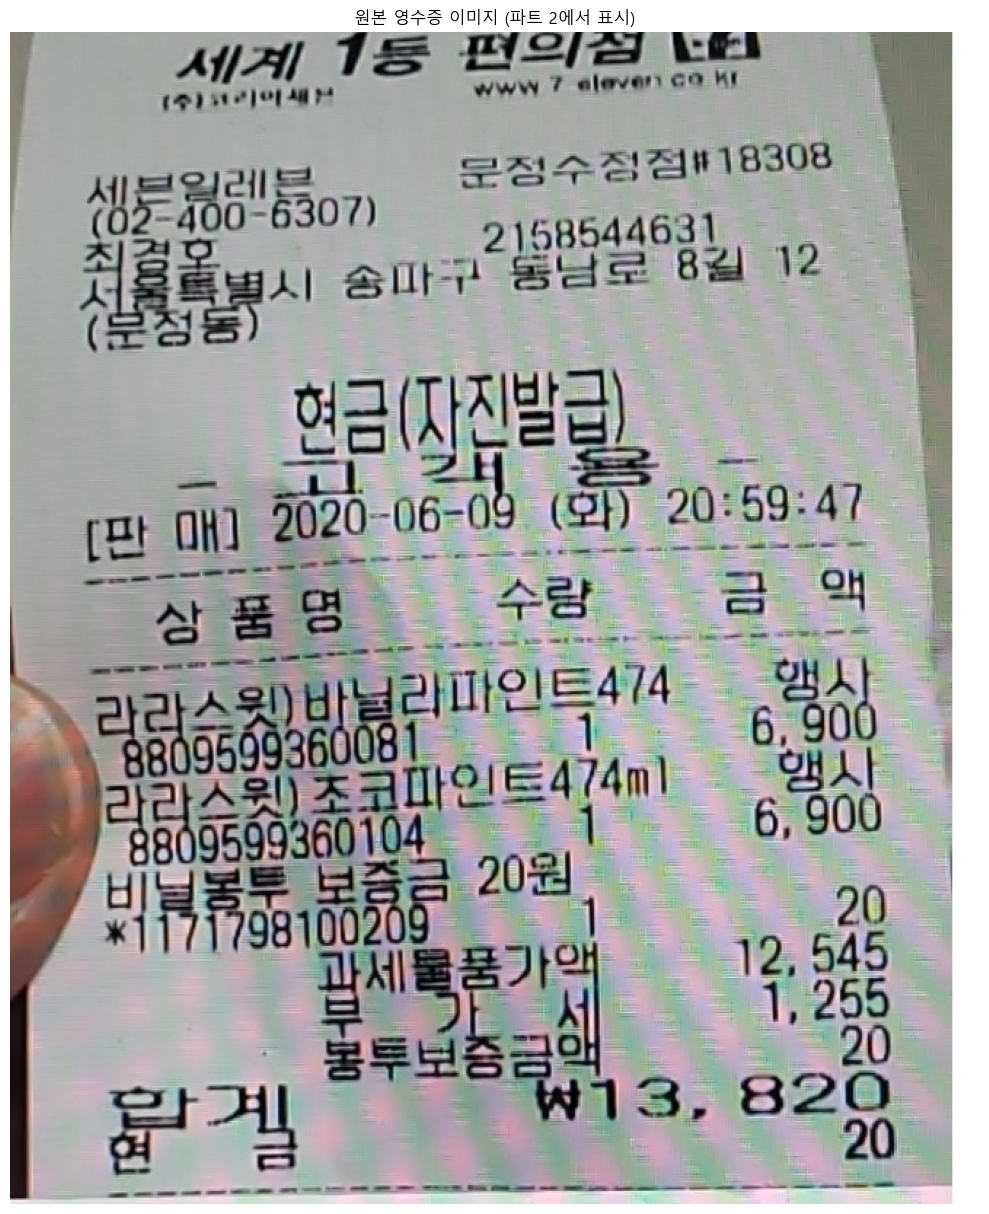

ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÌëúÏãú ÏôÑÎ£å (ÌååÌä∏ 2).

=== Google Cloud Vision API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ Ï¥àÍ∏∞Ìôî ÏãúÎèÑ (ÌååÌä∏ 2)... ===
Google Cloud Vision API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ Ï¥àÍ∏∞Ìôî ÏÑ±Í≥µ (ÌôòÍ≤Ω Î≥ÄÏàò ÏûêÎèô Í∞êÏßÄ, ÌååÌä∏ 2).

=== Google Cloud Vision APIÎ°ú OCR Ï≤òÎ¶¨ ÏãúÏûë (ÌååÌä∏ 2)... ===
Google Cloud Vision APIÎ•º ÏÇ¨Ïö©Ìïú OCR Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù (ÌååÌä∏ 2): 401 Request had invalid authentication credentials. Expected OAuth 2 access token, login cookie or other valid authentication credential. See https://developers.google.com/identity/sign-in/web/devconsole-project. [reason: "ACCESS_TOKEN_EXPIRED"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
metadata {
  key: "method"
  value: "google.cloud.vision.v1.ImageAnnotator.BatchAnnotateImages"
}
]
ÏãúÍ∞ÅÌôîÌï† Ï∂©Î∂ÑÌïú OCR Í≤∞Í≥º(ÌÖçÏä§Ìä∏ ÏöîÏÜå)Í∞Ä ÏóÜÍ±∞ÎÇò ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏóÜÏäµÎãàÎã§ (ÌååÌä∏ 2).
OCR Í≤∞Í≥ºÍ∞Ä ÎπÑÏñ¥ÏûàÍ±∞ÎÇò Í≥µÎ∞±Îßå ÏûàÏñ¥ Gemma JSON Íµ¨Ï°∞ÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§ (Ìå

In [4]:
# <VSCode-Cell id="part2_processing_and_saving" language="python">
# Ïù¥ ÏÖÄÏùÑ Ïã§ÌñâÌïòÍ∏∞ Ï†ÑÏóê ÏúÑÏùò "part1_initial_setup_and_load" ÏÖÄÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ïã§ÌñâÎêòÏñ¥ÏïºÌï®.
# receipt_image_pil, image_path, gemma_model_id, base_folder_path, output_json_file_template Îì±Ïùò Î≥ÄÏàò ÏÑ§Ï†ï ÎêòÏóàÎäîÏßÄ ÌôïÏù∏

# ----------------------------------------------------------------
# 3. ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÌëúÏãú (ÌååÌä∏ 2 ÏãúÏûë)
# ----------------------------------------------------------------
print("\n--- ÌååÌä∏ 2 (Ï≤òÎ¶¨ Î∞è Ï†ÄÏû•) ÏãúÏûë ---")
if receipt_image_pil: # receipt_image_pil Í∞ùÏ≤¥Í∞Ä part1ÏóêÏÑú ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î°úÎìúÎêòÏóàÎäîÏßÄ ÌôïÏù∏
    try:
        plt.figure(figsize=(10, 15))
        plt.title("ÏõêÎ≥∏ ÏòÅÏàòÏ¶ù Ïù¥ÎØ∏ÏßÄ (ÌååÌä∏ 2ÏóêÏÑú ÌëúÏãú)")
        plt.imshow(receipt_image_pil)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        print("ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÌëúÏãú ÏôÑÎ£å (ÌååÌä∏ 2).")
    except Exception as e:
        print(f"Ïù¥ÎØ∏ÏßÄ ÌëúÏãú Ï§ë Ïò§Î•ò Î∞úÏÉù (ÌååÌä∏ 2): {e}")
else:
    print("Ïù¥ÎØ∏ÏßÄ Í∞ùÏ≤¥(receipt_image_pil)Í∞Ä Î°úÎìúÎêòÏßÄ ÏïäÏïÑ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÎ•º ÌëúÏãúÌï† Ïàò ÏóÜÏäµÎãàÎã§ (ÌååÌä∏ 2).")
    print("ÌååÌä∏ 1 ÏÖÄÏùÑ Î®ºÏ†Ä Ïã§ÌñâÌïòÍ≥† Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÎ•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")

# ----------------------------------------------------------------
# 4. Google Cloud Vision APIÎ•º ÏÇ¨Ïö©Ìïú OCR Ï≤òÎ¶¨
# ----------------------------------------------------------------
vision_client = None
ocr_full_text_for_gemma = ""  # OCR Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
texts_from_vision_api = None  # Vision APIÏùò text_annotations Ï†ÑÏ≤¥Î•º Ï†ÄÏû•Ìï† Î≥ÄÏàò Ï¥àÍ∏∞Ìôî

print("\n=== Google Cloud Vision API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ Ï¥àÍ∏∞Ìôî ÏãúÎèÑ (ÌååÌä∏ 2)... ===")
try:
    # GOOGLE_APPLICATION_CREDENTIALS ÌôòÍ≤Ω Î≥ÄÏàòÍ∞Ä .env ÌååÏùºÏùÑ ÌÜµÌï¥ Ïò¨Î∞îÎ•¥Í≤å ÏÑ§Ï†ïÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï® (ÌååÌä∏ 1ÏóêÏÑú Ï≤òÎ¶¨).
    # ÌååÌä∏ 1ÏóêÏÑú ÌôòÍ≤Ω Î≥ÄÏàòÍ∞Ä ÏÑ§Ï†ïÎêòÏóàÏúºÎØÄÎ°ú, Î≥ÑÎèÑÏùò credentials ÌååÏùº ÏßÄÏ†ï ÏóÜÏù¥ ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ ÏÉùÏÑ± Í∞ÄÎä•.
    vision_client = vision.ImageAnnotatorClient()
    print("Google Cloud Vision API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ Ï¥àÍ∏∞Ìôî ÏÑ±Í≥µ (ÌôòÍ≤Ω Î≥ÄÏàò ÏûêÎèô Í∞êÏßÄ, ÌååÌä∏ 2).")
except Exception as e:
    print(f"Google Cloud Vision API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ Ï¥àÍ∏∞Ìôî Ïò§Î•ò (ÌååÌä∏ 2): {e}")
    print("  ÌååÌä∏ 1ÏóêÏÑú .env ÌååÏùºÏùò GOOGLE_APPLICATION_CREDENTIALS ÏÑ§Ï†ï Î∞è JSON ÌÇ§ ÌååÏùº Í≤ΩÎ°úÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
    vision_client = None

if vision_client and image_path and os.path.exists(image_path) and receipt_image_pil:
    print("\n=== Google Cloud Vision APIÎ°ú OCR Ï≤òÎ¶¨ ÏãúÏûë (ÌååÌä∏ 2)... ===")
    try:
        with io.open(image_path, 'rb') as image_file_for_vision:
            content_for_vision = image_file_for_vision.read()
        
        image_to_process_vision = vision.Image(content=content_for_vision)
        
        response_from_vision = vision_client.text_detection(image=image_to_process_vision)
        texts_from_vision_api = response_from_vision.text_annotations # API ÏùëÎãµÏùò text_annotations Ï†ÄÏû•

        if response_from_vision.error.message:
            print(f"Vision API Ïò§Î•ò Î∞úÏÉù (ÌååÌä∏ 2): {response_from_vision.error.message}")
        elif not texts_from_vision_api:
            print("OCR Í≤∞Í≥º (ÌååÌä∏ 2): Vision APIÏóêÏÑú ÌÖçÏä§Ìä∏Î•º Í∞êÏßÄÌïòÏßÄ Î™ªÌñàÏäµÎãàÎã§.")
        else:
            print(f"OCR Ï≤òÎ¶¨ ÏôÑÎ£å (ÌååÌä∏ 2): {len(texts_from_vision_api)} Í∞úÏùò ÌÖçÏä§Ìä∏ ÏöîÏÜå(annotations) Í∞êÏßÄÎê®.")
            ocr_full_text_for_gemma = texts_from_vision_api[0].description # Ï†ÑÏ≤¥ ÌÖçÏä§Ìä∏ Ï∂îÏ∂ú
            
            print("\n--- Google Cloud Vision APIÍ∞Ä Ïù∏ÏãùÌïú Ï†ÑÏ≤¥ ÌÖçÏä§Ìä∏ (ÌååÌä∏ 2) ---")
            ocr_lines_for_print = ocr_full_text_for_gemma.split('\n')
            for i, line in enumerate(ocr_lines_for_print[:100]): 
                 print(f"  Line {i+1}: {line}")
            if len(ocr_lines_for_print) > 100:
                print(f"  ... (Ï¥ù {len(ocr_lines_for_print)} Ï§Ñ Ï§ë ÏùºÎ∂ÄÎßå ÌëúÏãú)")
            print("--- ---")

    except Exception as e:
        print(f"Google Cloud Vision APIÎ•º ÏÇ¨Ïö©Ìïú OCR Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù (ÌååÌä∏ 2): {e}")
        ocr_full_text_for_gemma = "" 
        texts_from_vision_api = None
else:
    if not vision_client:
        print("Google Cloud Vision API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Í∞Ä Ï¥àÍ∏∞ÌôîÎêòÏßÄ ÏïäÏïÑ OCR Ï≤òÎ¶¨Î•º Í±¥ÎÑàÎúÅÎãàÎã§ (ÌååÌä∏ 2).")
    if not (image_path and os.path.exists(image_path) and receipt_image_pil) and vision_client: 
        print(f"Ïù¥ÎØ∏ÏßÄ ÌååÏùº({image_path})Ïù¥ ÏóÜÍ±∞ÎÇò Î°úÎìúÎêòÏßÄ ÏïäÏïÑ OCR Ï≤òÎ¶¨Î•º Í±¥ÎÑàÎúÅÎãàÎã§ (ÌååÌä∏ 2).")
        print("  ÌååÌä∏ 1 ÏÖÄÏùÑ Ïã§ÌñâÌïòÏó¨ Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Î∞è Î°úÎìú ÏÉÅÌÉúÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.")

# ----------------------------------------------------------------
# 5. OCR Í≤∞Í≥º ÏãúÍ∞ÅÌôî (Vision API Î∞îÏö¥Îî© Î∞ïÏä§)
# ----------------------------------------------------------------
if texts_from_vision_api and len(texts_from_vision_api) > 1 and receipt_image_pil:
    print("\n=== OCR Í≤∞Í≥º ÏãúÍ∞ÅÌôî Ï§ë (ÌååÌä∏ 2)... ===")
    try:
        plt.figure(figsize=(12, 18)) 
        plt.imshow(receipt_image_pil)
        ax = plt.gca()

        for text_annotation in texts_from_vision_api[1:]: 
            vertices = [(vertex.x, vertex.y) for vertex in text_annotation.bounding_poly.vertices]
            polygon = patches.Polygon(vertices, closed=True, linewidth=1, edgecolor='lime', facecolor='none')
            ax.add_patch(polygon)
            
            display_text = text_annotation.description
            plt.text(vertices[0][0], vertices[0][1] - 5, display_text, 
                     color="magenta", fontsize=6,
                     bbox=dict(facecolor="white", alpha=0.7, pad=0.1, edgecolor='none')) 
        
        plt.title("Google Cloud Vision API OCR Í≤∞Í≥º (Î∞îÏö¥Îî© Î∞ïÏä§, ÌååÌä∏ 2)")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        print("OCR Í≤∞Í≥º ÏãúÍ∞ÅÌôî ÏôÑÎ£å (ÌååÌä∏ 2).")
    except Exception as e:
        print(f"OCR Í≤∞Í≥º ÏãúÍ∞ÅÌôî Ï§ë Ïò§Î•ò Î∞úÏÉù (ÌååÌä∏ 2): {e}")
elif not receipt_image_pil:
    print("ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä Î°úÎìúÎêòÏßÄ ÏïäÏïÑ OCR Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï† Ïàò ÏóÜÏäµÎãàÎã§ (ÌååÌä∏ 2).")
else:
    print("ÏãúÍ∞ÅÌôîÌï† Ï∂©Î∂ÑÌïú OCR Í≤∞Í≥º(ÌÖçÏä§Ìä∏ ÏöîÏÜå)Í∞Ä ÏóÜÍ±∞ÎÇò ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏóÜÏäµÎãàÎã§ (ÌååÌä∏ 2).")

# ----------------------------------------------------------------
# 6. GemmaÎ•º Ïù¥Ïö©Ìïú JSON Íµ¨Ï°∞Ìôî
# ----------------------------------------------------------------
parsed_json_from_gemma = None 
gemma_model_loaded = None     
gemma_tokenizer_loaded = None 

if ocr_full_text_for_gemma and ocr_full_text_for_gemma.strip():
    print("\n=== Gemma Î™®Îç∏ Î°úÎî© Î∞è Ïã§Ìñâ Ï§ÄÎπÑ (ÌååÌä∏ 2)... ===")
    print(f"ÏÇ¨Ïö©Ìï† Gemma Î™®Îç∏ ID (ÌååÌä∏ 1ÏóêÏÑú ÏÑ§Ï†ïÎê®): '{gemma_model_id}'")
    print(f"'{gemma_model_id}' Î™®Îç∏ Î°úÎî© ÏãúÎèÑ (ÌååÌä∏ 2)...")
    
    try:
        gemma_tokenizer_loaded = AutoTokenizer.from_pretrained(gemma_model_id)
        
        if torch.cuda.is_available():
            device_for_gemma = "cuda"
            try:
                _ = torch.tensor([1.0], dtype=torch.bfloat16).to(device_for_gemma)
                dtype_for_gemma = torch.bfloat16
                print(f"NVIDIA GPU Í∞êÏßÄÎê®. GemmaÎ•º {device_for_gemma}ÏóêÏÑú {dtype_for_gemma}Î°ú Î°úÎìú ÏãúÎèÑ (ÌååÌä∏ 2).")
            except RuntimeError: 
                try:
                    _ = torch.tensor([1.0], dtype=torch.float16).to(device_for_gemma)
                    dtype_for_gemma = torch.float16
                    print(f"NVIDIA GPU Í∞êÏßÄÎê® (bfloat16 ÎØ∏ÏßÄÏõê). GemmaÎ•º {device_for_gemma}ÏóêÏÑú {dtype_for_gemma}Î°ú Î°úÎìú ÏãúÎèÑ (ÌååÌä∏ 2).")
                except RuntimeError: 
                    dtype_for_gemma = torch.float32
                    print(f"NVIDIA GPU Í∞êÏßÄÎê® (bfloat16/float16 ÎØ∏ÏßÄÏõê). GemmaÎ•º {device_for_gemma}ÏóêÏÑú {dtype_for_gemma}Î°ú Î°úÎìú ÏãúÎèÑ (ÌååÌä∏ 2).")
        else:
            device_for_gemma = "cpu"
            dtype_for_gemma = torch.float32 
            print(f"NVIDIA GPUÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. GemmaÎ•º CPUÎ°ú Î°úÎìúÌï©ÎãàÎã§ (ÌååÌä∏ 2, Îß§Ïö∞ ÎäêÎ¶¥ Ïàò ÏûàÏùå).")

        gemma_model_loaded = Gemma3ForConditionalGeneration.from_pretrained(
            gemma_model_id,
            torch_dtype=dtype_for_gemma,
            device_map="auto", 
            load_in_4bit=True, # ÌïÑÏöîÏãú Ï£ºÏÑù Ìï¥Ï†ú (bitsandbytes ÌïÑÏöî)
        )
        print(f"'{gemma_model_id}' Î™®Îç∏ Î°úÎìú ÏôÑÎ£å. Ïã§Ìñâ Ïû•Ïπò: {gemma_model_loaded.device} (ÌååÌä∏ 2)")

    except Exception as e:
        print(f"Gemma Î™®Îç∏ Î°úÎî© Ï§ë Ïò§Î•ò (ÌååÌä∏ 2): {e}")
        gemma_model_loaded = None 
        gemma_tokenizer_loaded = None

    if gemma_model_loaded and gemma_tokenizer_loaded:
        prompt_for_gemma = f"""ÎãπÏã†ÏùÄ Ï†úÍ≥µÎêú "OCR Í≤∞Í≥º" ÌÖçÏä§Ìä∏ÏóêÏÑú Ï†ïÎ≥¥Î•º Ï∂îÏ∂úÌïòÏó¨ ÏßÄÏ†ïÎêú JSON ÌòïÏãùÏúºÎ°ú Ï†ïÎ¶¨ÌïòÎäî AI Ïñ¥ÏãúÏä§ÌÑ¥Ìä∏ÏûÖÎãàÎã§.
Í∞ÄÏû• Ï§ëÏöîÌïú Î™©ÌëúÎäî ÏòÅÏàòÏ¶ùÏùò **ÏµúÏ¢Ö Í≤∞Ï†ú Ï¥ùÏï° (total_price)**ÏùÑ Ï†ïÌôïÌïòÍ≤å Ï∂îÏ∂úÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
Îã§Î•∏ Î™®Îì† Ï†ïÎ≥¥ÎèÑ Ï§ëÏöîÌïòÏßÄÎßå, **total_price**Îäî Î∞òÎìúÏãú Ìè¨Ìï®ÎêòÏñ¥Ïïº Ìï©ÎãàÎã§.

**Ï†ïÎ≥¥ Ï∂îÏ∂ú ÏßÄÏπ®:**
*   **Î∞òÎìúÏãú "OCR Í≤∞Í≥º" ÌÖçÏä§Ìä∏Ïóê ÏûàÎäî Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï¥Ïïº Ìï©ÎãàÎã§.** ÏóÜÎäî Ï†ïÎ≥¥Îäî Ï∂îÏ∏°ÌïòÍ±∞ÎÇò ÏûÑÏùòÎ°ú ÎßåÎì§ÏßÄ ÎßàÏÑ∏Ïöî.
*   Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Ï†ïÎ≥¥Îäî Îπà Î¨∏ÏûêÏó¥("") ÎòêÎäî JSON ÌòïÏãùÏóê Îî∞Îùº `null` Í∞íÏúºÎ°ú ÌëúÏãúÌï©ÎãàÎã§.
*   Ïà´Ïûê Í∞í(Í∞ÄÍ≤©, ÏàòÎüâ Îì±)ÏùÄ ÏΩ§Îßà(,)Î•º Ï†úÍ±∞ÌïòÍ≥† Ïà´Ïûê ÌòïÌÉúÏùò Î¨∏ÏûêÏó¥Î°ú ÌëúÌòÑÌï¥Ï£ºÏÑ∏Ïöî (Ïòà: "48360").
*   ÎÇ†Ïßú Î∞è ÏãúÍ∞ÑÏùÄ "YYYY-MM-DD HH:MM:SS" ÌòïÏãùÏùÑ ÏµúÏö∞ÏÑ†ÏúºÎ°ú ÏãúÎèÑÌïòÍ≥†, Ïñ¥Î†§Ïö∞Î©¥ OCR Í≤∞Í≥ºÏóê Ïù∏ÏãùÎêú Í∑∏ÎåÄÎ°ú Ï†úÍ≥µÌï¥Ï£ºÏÑ∏Ïöî.
*   ÏÉÅÌíà Î™©Î°ù(items)ÏóêÏÑú Îã®Í∞Ä(unit_price), ÏàòÎüâ(quantity), Ìï©Í≥Ñ(total)Îäî Ïà´Ïûê ÌòïÌÉúÏùò Î¨∏ÏûêÏó¥Î°ú, ÏÉÅÌíàÎ™Ö(name)ÏùÄ Î¨∏ÏûêÏó¥Î°ú Ï∂îÏ∂úÌï¥Ï£ºÏÑ∏Ïöî.
*   ÏàòÎüâÏù¥ Î™ÖÏãúÎêòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ Í∏∞Î≥∏Í∞íÏúºÎ°ú "1"ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

**ÏöîÍµ¨ÎêòÎäî JSON ÌòïÏãù ÏòàÏãú:**
```json
{{
  "store_name": "Í∞ÄÍ≤å Ïù¥Î¶Ñ (Î¨∏ÏûêÏó¥)",
  "address": "Í∞ÄÍ≤å Ï£ºÏÜå (Î¨∏ÏûêÏó¥)",
  "business_number": "ÏÇ¨ÏóÖÏûê Î≤àÌò∏ (Î¨∏ÏûêÏó¥, Ïòà: 123-45-67890)",
  "phone": "Ï†ÑÌôîÎ≤àÌò∏ (Î¨∏ÏûêÏó¥, Ïòà: 010-1234-5678)",
  "date": "Í±∞Îûò ÎÇ†Ïßú Î∞è ÏãúÍ∞Ñ (Î¨∏ÏûêÏó¥, Ïòà: 2024-08-17 11:31:45)",
  "total_price": "ÏòÅÏàòÏ¶ùÏùò ÏµúÏ¢Ö Í≤∞Ï†ú Ï¥ùÏï° (Ïà´Ïûê Î¨∏ÏûêÏó¥, Ïòà: 48360)",
  "items": [
    {{
      "name": "ÏÉÅÌíàÎ™Ö1 (Î¨∏ÏûêÏó¥)",
      "unit_price": "Îã®Í∞Ä1 (Ïà´Ïûê Î¨∏ÏûêÏó¥)",
      "quantity": "ÏàòÎüâ1 (Ïà´Ïûê Î¨∏ÏûêÏó¥, ÏóÜÏúºÎ©¥ 1)",
      "total": "ÏÉÅÌíà1 Ï¥ùÏï° (Ïà´Ïûê Î¨∏ÏûêÏó¥)"
    }},
    {{
      "name": "ÏÉÅÌíàÎ™Ö2 (Î¨∏ÏûêÏó¥)",
      "unit_price": "Îã®Í∞Ä2 (Ïà´Ïûê Î¨∏ÏûêÏó¥)",
      "quantity": "ÏàòÎüâ2 (Ïà´Ïûê Î¨∏ÏûêÏó¥)",
      "total": "ÏÉÅÌíà2 Ï¥ùÏï° (Ïà´Ïûê Î¨∏ÏûêÏó¥)"
    }}
  ]
}}
```

--- OCR Í≤∞Í≥º ÏãúÏûë ---
{ocr_full_text_for_gemma}
--- OCR Í≤∞Í≥º ÎÅù ---

ÏúÑ "OCR Í≤∞Í≥º"Î•º Î∞îÌÉïÏúºÎ°ú JSON Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
ÏùëÎãµÏùÄ Îã§Î•∏ ÏÑ§Î™Ö ÏóÜÏù¥ ÏàúÏàòÌïú JSON Í∞ùÏ≤¥Îßå Ìè¨Ìï®Ìï¥Ïïº Ìï©ÎãàÎã§.
**ÌäπÌûà, `total_price` ÌïÑÎìúÏóêÎäî ÏòÅÏàòÏ¶ùÏóê Î™ÖÏãúÎêú ÏÇ¨Ïö©ÏûêÍ∞Ä Ïã§Ï†úÎ°ú ÏßÄÎ∂àÌï¥Ïïº ÌïòÎäî ÏµúÏ¢Ö Í∏àÏï°ÏùÑ Ï†ïÌôïÌûà Í∏∞ÏûÖÌï¥Ïïº Ìï©ÎãàÎã§.**

Ï†ïÎ¶¨Îêú JSON:
"""

        print("\n=== Gemma Î™®Îç∏Î°ú JSON ÏÉùÏÑ± ÏãúÏûë (ÌååÌä∏ 2)... ===")
        generated_json_text_from_model = ""
        try:
            inputs = gemma_tokenizer_loaded(
                prompt_for_gemma, 
                return_tensors="pt", 
                padding=True, 
                truncation=True, # ÏûÖÎ†•Ïù¥ Í∏∏ Í≤ΩÏö∞ ÏûòÎùºÎÉÑ
            ).to(gemma_model_loaded.device)
            
            # generate Ìï®Ïàò Ìò∏Ï∂ú Î∞©Ïãù ÏàòÏ†ï: pad_token_idÎ•º Î™ÖÏãúÏ†ÅÏúºÎ°ú Ï†ÑÎã¨ÌïòÏßÄ ÏïäÍ≥†, attention_maskÎ•º ÏÇ¨Ïö©
            outputs = gemma_model_loaded.generate(
                inputs.input_ids,
                attention_mask=inputs.attention_mask, 
                max_new_tokens=2048,  
                temperature=0.0,      
                do_sample=False,
                # pad_token_idÎäî Ïó¨Í∏∞ÏÑú Ï†ÑÎã¨ÌïòÏßÄ ÏïäÏùå (Î™®Îç∏ Í∏∞Î≥∏Í∞í ÎòêÎäî ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä ÏÑ§Ï†ï Îî∞Î¶Ñ)
            )
            
            # ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ Î∂ÄÎ∂ÑÎßå Ï∂îÏ∂ú (ÏûÖÎ†• ÌîÑÎ°¨ÌîÑÌä∏ Ï†úÏô∏)
            # generate Ìï®ÏàòÍ∞Ä ÏûÖÎ†• IDÎ•º Ìè¨Ìï®ÌïòÏó¨ Î∞òÌôòÌïòÎäî Í≤ΩÏö∞, ÏÉùÏÑ±Îêú Î∂ÄÎ∂ÑÎßå ÏûòÎùºÎÉÖÎãàÎã§.
            # Gemma Î™®Îç∏Í≥º transformers Î≤ÑÏ†ÑÏóê Îî∞Îùº generateÏùò Í∏∞Î≥∏ ÎèôÏûëÏù¥ Îã§Î•º Ïàò ÏûàÏäµÎãàÎã§.
            # ÏùºÎ∞òÏ†ÅÏúºÎ°ú input_idsÎ•º Ï†ÑÎã¨ÌïòÎ©¥, outputsÏóêÎäî input_ids Ïù¥ÌõÑÏùò ÏÉùÏÑ±Îêú ÌÜ†ÌÅ∞Îì§Ïù¥ Ìè¨Ìï®Îê©ÎãàÎã§.
            # ÎßåÏïΩ outputs[0]Ïù¥ Ïù¥ÎØ∏ ÏÉùÏÑ±Îêú ÌÜ†ÌÅ∞Îì§Îßå Ìè¨Ìï®ÌïúÎã§Î©¥, ÏïÑÎûò Ïä¨ÎùºÏù¥Ïã±ÏùÄ Î∂àÌïÑÏöîÌïòÍ±∞ÎÇò Ïò§Î•òÎ•º Ïú†Î∞úÌï† Ïàò ÏûàÏäµÎãàÎã§.
            # ÌïòÏßÄÎßå, ÏïàÏ†ÑÌïòÍ≤å ÏûÖÎ†• Í∏∏Ïù¥Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏûòÎùºÎÇ¥Îäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†ÅÏûÖÎãàÎã§.
            if inputs.input_ids.shape[-1] < outputs.shape[-1]: # ÏÉùÏÑ±Îêú ÌÜ†ÌÅ∞Ïù¥ ÏûàÏùÑ Í≤ΩÏö∞
                 output_tokens_only = outputs[0][inputs.input_ids.shape[-1]:]
            else: # ÏÉùÏÑ±Îêú ÌÜ†ÌÅ∞Ïù¥ ÏóÜÎäî Í≤ΩÏö∞ (Ïòà: max_new_tokens=0 ÎòêÎäî Ïò§Î•ò)
                 output_tokens_only = outputs[0] # ÎòêÎäî Îπà ÌÖêÏÑúÎ°ú Ï≤òÎ¶¨

            generated_text_from_model_raw = gemma_tokenizer_loaded.decode(output_tokens_only, skip_special_tokens=True)

            print("\n--- Gemma Î™®Îç∏ ÏÉùÏÑ± ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ (ÌååÌä∏ 2) ---")
            print(generated_text_from_model_raw)
            
            json_output_marker = "Ï†ïÎ¶¨Îêú JSON:"
            if json_output_marker in generated_text_from_model_raw:
                generated_json_text_from_model = generated_text_from_model_raw.split(json_output_marker, 1)[-1].strip()
            else:
                generated_json_text_from_model = generated_text_from_model_raw.strip()

            # JSON ÏΩîÎìú Î∏îÎ°ù Ï∂îÏ∂ú (```json ... ```)
            match_json_code_block = re.search(r"```json\s*([\s\S]+?)\s*```", generated_json_text_from_model, re.DOTALL)
            if match_json_code_block:
                generated_json_text_from_model = match_json_code_block.group(1).strip()
            else:
                # ÏΩîÎìú Î∏îÎ°ùÏù¥ ÏóÜÏùÑ Í≤ΩÏö∞, Í∞ÄÏû• Î∞îÍπ•Ï™Ω Ï§ëÍ¥ÑÌò∏ Í∏∞Ï§ÄÏúºÎ°ú Ï∂îÏ∂ú ÏãúÎèÑ
                first_brace = generated_json_text_from_model.find('{')
                last_brace = generated_json_text_from_model.rfind('}')
                if first_brace != -1 and last_brace != -1 and first_brace < last_brace:
                    # Îã®Ïàú find/rfindÎ°ú Ï∞æÏùÄ Ï§ëÍ¥ÑÌò∏Í∞Ä Ïã§Ï†ú JSON Í∞ùÏ≤¥Ïùò ÏãúÏûë/ÎÅùÏù¥ ÏïÑÎãê Ïàò ÏûàÏùå
                    # Ï¢Ä Îçî Ï†ïÌôïÌïú JSON Í∞ùÏ≤¥ Í≤ΩÍ≥ÑÎ•º Ï∞æÍ∏∞ ÏúÑÌïú Î°úÏßÅ (Ïù¥Ï†Ñ ÏΩîÎìú Ïú†ÏßÄ)
                    temp_json_str = generated_json_text_from_model[first_brace : last_brace+1]
                    try:
                        # ÏûÑÏãúÎ°ú ÌååÏã± ÏãúÎèÑÌïòÏó¨ Ïú†Ìö®Ìïú JSONÏù∏ÏßÄ ÌôïÏù∏ÌïòÍ≥†, Í∑∏ Î∂ÄÎ∂ÑÏùÑ ÏÇ¨Ïö©
                        json.loads(temp_json_str)
                        generated_json_text_from_model = temp_json_str
                    except json.JSONDecodeError:
                        # ÌååÏã± Ïã§Ìå® Ïãú, Ïù¥Ï†ÑÏùò Î≥µÏû°Ìïú Ï§ëÏ≤© Ï§ëÍ¥ÑÌò∏ Î°úÏßÅ ÏÇ¨Ïö© ÎòêÎäî Îã§Î•∏ Î∞©Î≤ï Í≥†Î†§
                        # ÏïÑÎûòÎäî Ïù¥Ï†Ñ ÏΩîÎìúÏùò Ï§ëÏ≤© Ï§ëÍ¥ÑÌò∏ Î°úÏßÅ ÏùºÎ∂Ä
                        start_brace_index = generated_json_text_from_model.rfind("{") # Í∞ÄÏû• ÎßàÏßÄÎßâ '{'Î∂ÄÌÑ∞ ÏãúÏûë
                        end_brace_index = -1
                        if start_brace_index != -1:
                            open_braces_count = 0
                            for i in range(start_brace_index, len(generated_json_text_from_model)):
                                if generated_json_text_from_model[i] == '{': open_braces_count += 1
                                elif generated_json_text_from_model[i] == '}':
                                    open_braces_count -= 1
                                    if open_braces_count == 0: end_brace_index = i; break
                            if end_brace_index != -1 and start_brace_index < end_brace_index : 
                                generated_json_text_from_model = generated_json_text_from_model[start_brace_index : end_brace_index+1].strip()
                            else:
                                # ÏúÑ Î°úÏßÅÏúºÎ°úÎèÑ Î™ª Ï∞æÏúºÎ©¥, Í∑∏ÎÉ• Ï≤òÏùå Ï∞æÏùÄ Ï§ëÍ¥ÑÌò∏ ÏÇ¨Ïö©
                                if first_brace != -1 and last_brace != -1 and first_brace < last_brace:
                                     generated_json_text_from_model = generated_json_text_from_model[first_brace:last_brace+1].strip()
                                else:
                                     generated_json_text_from_model = "" # ÏµúÌõÑÏùò Í≤ΩÏö∞ Îπà Î¨∏ÏûêÏó¥
                        else:
                            generated_json_text_from_model = ""
                elif first_brace != -1 and last_brace != -1 and first_brace < last_brace : # Îã®Ïàú Ï§ëÍ¥ÑÌò∏ Ïåç
                     generated_json_text_from_model = generated_json_text_from_model[first_brace:last_brace+1].strip()
                else: # Ï§ëÍ¥ÑÌò∏Î•º Î™ªÏ∞æÏúºÎ©¥ Îπà Î¨∏ÏûêÏó¥
                    generated_json_text_from_model = ""


            print("\n--- Ï∂îÏ∂úÎêú JSON ÌÖçÏä§Ìä∏ (ÌååÏã± ÏãúÎèÑ Ï†Ñ, ÌååÌä∏ 2) ---")
            print(generated_json_text_from_model)

            if generated_json_text_from_model:
                try:
                    # ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú JSON ÌååÏã± Ï†Ñ, Î¨∏ÏûêÏó¥ ÏïûÎí§Ïùò Î∂àÌïÑÏöîÌïú Í≥µÎ∞±Ïù¥ÎÇò ÎßàÌÅ¨Îã§Ïö¥ Ï†úÍ±∞
                    # Ïù¥ÎØ∏ ÏúÑÏóêÏÑú ```json ``` Ï†úÍ±∞ Î°úÏßÅÏù¥ ÏûàÏßÄÎßå, Ìïú Î≤à Îçî Ï†ïÎ¶¨
                    cleaned_json_text = generated_json_text_from_model.strip()
                    if cleaned_json_text.startswith("```json"):
                        cleaned_json_text = cleaned_json_text[len("```json"):].strip()
                    if cleaned_json_text.endswith("```"):
                        cleaned_json_text = cleaned_json_text[:-len("```")].strip()
                    
                    # Í∞ÄÏû• Î∞îÍπ•Ï™Ω Ï§ëÍ¥ÑÌò∏Îßå ÎÇ®Í∏∞ÎèÑÎ°ù ÌïúÎ≤à Îçî ÏãúÎèÑ (Î™®Îç∏Ïù¥ Î∂àÌïÑÏöîÌïú ÌÖçÏä§Ìä∏Î•º ÏïûÎí§Î°ú Î∂ôÏùº Í≤ΩÏö∞ ÎåÄÎπÑ)
                    first_brace_final = cleaned_json_text.find('{')
                    last_brace_final = cleaned_json_text.rfind('}')
                    if first_brace_final != -1 and last_brace_final != -1 and first_brace_final < last_brace_final:
                        cleaned_json_text = cleaned_json_text[first_brace_final:last_brace_final+1]
                    
                    parsed_json_from_gemma = json.loads(cleaned_json_text)
                    print("\n--- Gemma ÏÉùÏÑ± Î∞è ÌååÏã±Îêú JSON Í∞ùÏ≤¥ (ÌååÌä∏ 2) ---")
                    print(json.dumps(parsed_json_from_gemma, indent=2, ensure_ascii=False))
                    
                    if "total_price" in parsed_json_from_gemma and parsed_json_from_gemma.get("total_price") is not None:
                        print(f"\n Gemma Ï∂îÏ∂ú ÏµúÏ¢Ö Í≤∞Ï†ú Í∏àÏï°: {parsed_json_from_gemma['total_price']} (ÌååÌä∏ 2) üéØ")
                    else:
                        print("\n Gemma ÏÉùÏÑ± JSONÏóêÏÑú 'total_price'Î•º Ï∞æÏßÄ Î™ªÌïòÍ±∞ÎÇò ÎπÑÏñ¥ÏûàÏùå (ÌååÌä∏ 2).")
                except json.JSONDecodeError as e_json:
                    print(f"\nJSON ÌååÏã± Ïò§Î•ò (ÌååÌä∏ 2): {e_json}")
                    print(f"ÌååÏã± ÏãúÎèÑÌïú ÌÖçÏä§Ìä∏: '{cleaned_json_text}'")
            else:
                print("\nGemmaÎ°úÎ∂ÄÌÑ∞ Ïú†Ìö®Ìïú JSON ÌÖçÏä§Ìä∏Î•º Ï∂îÏ∂úÌïòÏßÄ Î™ªÌï® (ÌååÌä∏ 2).")
        except Exception as e_runtime:
            print(f"Gemma Î™®Îç∏ Ïã§Ìñâ ÎòêÎäî Í≤∞Í≥º Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò (ÌååÌä∏ 2): {e_runtime}")
            import traceback
            traceback.print_exc() # Ïò§Î•ò Î∞úÏÉù Ïãú Ïä§ÌÉù Ìä∏Î†àÏù¥Ïä§ Ï∂úÎ†•
else:
    if not (ocr_full_text_for_gemma and ocr_full_text_for_gemma.strip()):
        print("OCR Í≤∞Í≥ºÍ∞Ä ÎπÑÏñ¥ÏûàÍ±∞ÎÇò Í≥µÎ∞±Îßå ÏûàÏñ¥ Gemma JSON Íµ¨Ï°∞ÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§ (ÌååÌä∏ 2).")
    if not gemma_model_loaded or not gemma_tokenizer_loaded: 
        print("Gemma Î™®Îç∏ ÎòêÎäî ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÍ∞Ä Î°úÎìúÎêòÏßÄ ÏïäÏïÑ JSON Íµ¨Ï°∞ÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§ (ÌååÌä∏ 2).")

# ----------------------------------------------------------------
# 7. Í≤∞Í≥º ÌååÏùºÎ°ú Ï†ÄÏû•
# ----------------------------------------------------------------
if parsed_json_from_gemma: 
    safe_gemma_model_name = gemma_model_id.split('/')[-1].replace('-', '_').replace('.', '_')
    output_json_file = output_json_file_template.format(gemma_model_name=safe_gemma_model_name)
    output_json_path = os.path.join(base_folder_path, output_json_file)

    try:
        with open(output_json_path, 'w', encoding='utf-8') as f_out:
            json.dump(parsed_json_from_gemma, f_out, ensure_ascii=False, indent=2)
        print(f"\n Gemma Ï∂îÏ∂ú Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å (ÌååÌä∏ 2):")
        print(f"   {output_json_path}")
    except Exception as e_save:
        print(f"Í≤∞Í≥º ÌååÏùº Ï†ÄÏû• Ï§ë Ïò§Î•ò (ÌååÌä∏ 2): {e_save} (Í≤ΩÎ°ú: {output_json_path})")
else:
    print(f"\nGemmaÎ°úÎ∂ÄÌÑ∞ Ï∂îÏ∂úÎêú Ïú†Ìö®Ìïú JSON Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§ (ÌååÌä∏ 2).")

print("\n--- ÌååÌä∏ 2 (Ï≤òÎ¶¨ Î∞è Ï†ÄÏû•) ÏôÑÎ£å ---")
# </VSCode-Cell>